# Find peaks for calibration

## Na source

### title
LYSO in coincidance with both NaI detectors
beta electron on LYSO + 200keV +300keV on NaI

![](../exp_immages/Nasource_3_1.png)

In [9]:
TString Fname="./DST/Nasource_3_1.dst";
TTree* tree = new TTree("tree","data from ascii file");
tree->ReadFile(Fname.Data(),"evnum/I:A1/F:A2/F:A3/F:A4/F:T12/F:T32/F:T42/F:T34/F:PK1/F:PK2/F:PK3/F:PK4/F");

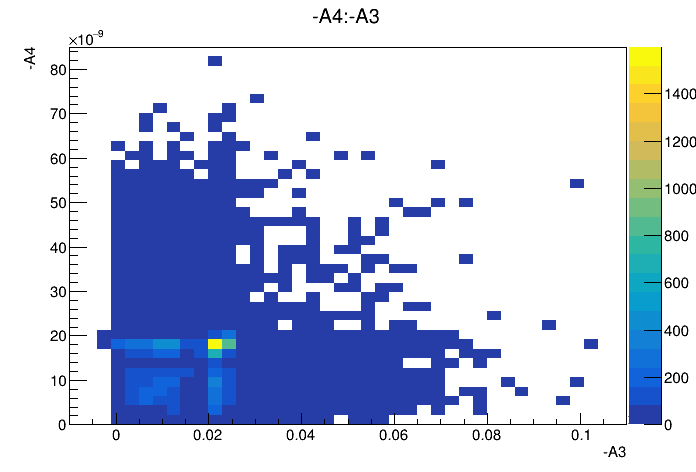

In [10]:
TCanvas* c = new TCanvas();
tree->Draw("-A4:-A3","", "colz"); //"-A3<4e-8 && -A4<4e-8 "
c->Draw();

Riduciamo il rumore

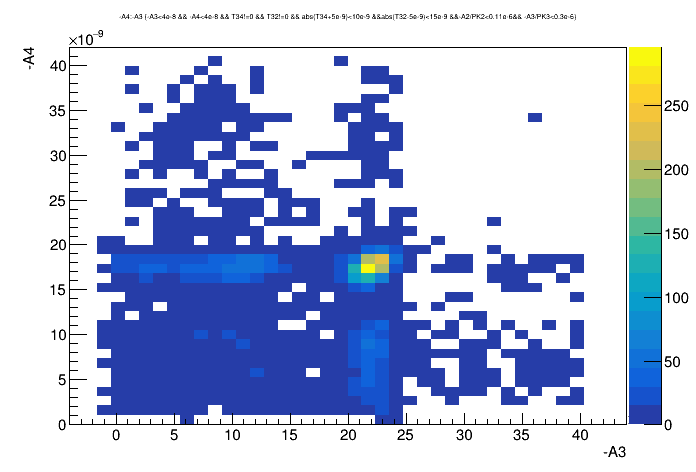

In [26]:
TCanvas* c = new TCanvas();
//tree->Draw("-A4:-A3","-A3<4e-8 && -A4<4e-8 ", "colz");
//tree->Draw("-A4-A3:T34", "-A3<6e-8 && -A4<6e-8 && abs(T34+5e-9)<7e-9 && abs(T32)<2e-8 && T34!=0 ", "colz");
//tree->Draw("T32:T34","-A3<4e-8 && -A4<4e-8 && T34!=0 && T32!=0 && abs(T34+5e-9)<10e-9 &&abs(T32-5e-9)<15e-9", "colz");
//tree->Draw("-A2/PK2:-A3/PK3","-A3<4e-8 && -A4<4e-8 && T34!=0 && T32!=0 && abs(T34+5e-9)<10e-9 &&abs(T32-5e-9)<15e-9 &&-A2/PK2<0.11e-6&& -A3/PK3<0.3e-6", "colz");
//tree->Draw("-A4:-A3", "-A3<6e-8 && -A4<6e-8 && abs(T34+5e-9)<7e-9 && abs(T32)<2e-8 && T34!=0", "colz");
//tree->Draw("T34:T32", "abs(T34+5e-9)<7e-9 && abs(T32)<2e-8", "colz");
tree->Draw("-A4:-A3","-A3<4e-8 && -A4<4e-8 && T34!=0 && T32!=0 && abs(T34+5e-9)<10e-9 &&abs(T32-5e-9)<15e-9 &&-A2/PK2<0.11e-6&& -A3/PK3<0.3e-6", "colz");

c->Draw();

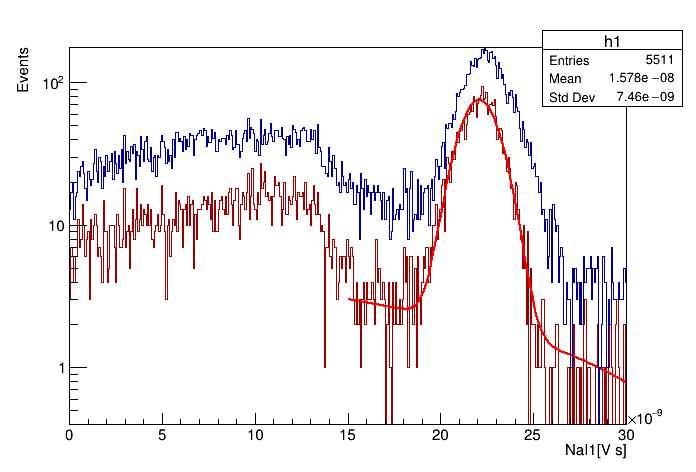

 FCN=143.377 FROM MIGRAD    STATUS=CONVERGED     286 CALLS         287 TOTAL
                     EDM=3.57544e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.22828e+00   6.70185e-01   8.18351e-04  -1.15094e-03
   2  p1           7.36486e+01   1.88420e+00   8.83281e-03  -1.47207e-04
   3  p2           2.21075e-08   2.29359e-11   1.30704e-13  -3.77904e+06
   4  p3           1.02901e-09   1.87756e-11   8.20168e-14  -1.00560e+07
   5  p4          -1.48314e+08   2.83480e+07   7.07215e+01  -2.65190e-11
NaI1
511 keV@ 2.21075e-08+-2.29359e-11
sig @ 511 keV 1.02901e-09+-1.87756e-11


Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).


In [14]:
TCanvas* c2 = new TCanvas();

TH1D* h1 = new TH1D("h1",";NaI1[V s];Events",400,0,30e-9);
tree->Draw("-A3>>h1","-A3<4e-8 && -A4<4e-8 && T34!=0 && T32!=0 && abs(T34+5e-9)<10e-9 &&abs(T32-5e-9)<15e-9 &&-A2/PK2<0.11e-6&& -A3/PK3<0.3e-6");
tree->Draw("-A3","","same");
h1->SetLineColor(kRed+2);


TF1* f1 = new TF1("f1","[0]+gaus(1)+[4]*x",0,50e-9);
f1->SetParameter(0,0);
f1->SetParameter(1,30);
f1->SetParameter(2,20.e-9); //centro gaussiana
f1->SetParameter(3,1e-9); //sigma gaussiana
f1->SetParameter(4,-1e9);
h1->Fit("f1"," ", " ", 15e-9, 30e-9); //L:likelyhood 

gPad->SetLogy();
//h1->GetXaxis()->SetTitle("NaI2 (Vxs)");
double p1 = f1->GetParameter(2); //centro gaussiana
double ep1 = f1->GetParError(2); //suo errore
double s1 = f1->GetParameter(3); //sigma gaussiana
double e1 = f1->GetParError(3);  //suo errore

cout << "NaI1" <<endl;
cout << "511 keV@ " << p1 << "+-" << ep1 << endl;
cout << "sig @ 511 keV " << s1 << "+-" << e1 << endl;

c2->Draw()

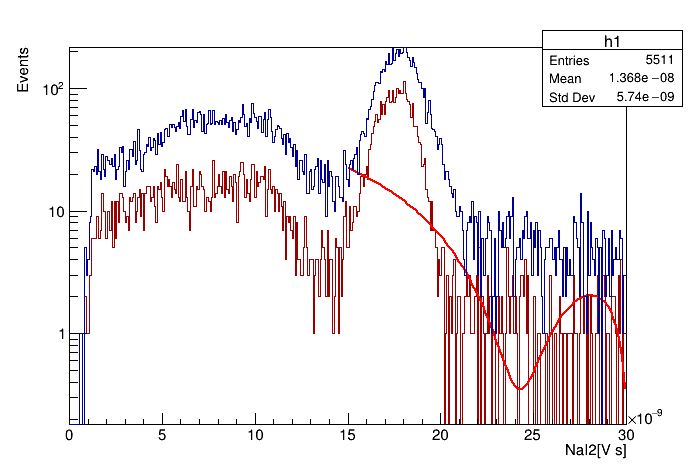

 FCN=2074.42 FROM MIGRAD    STATUS=CONVERGED     440 CALLS         441 TOTAL
                     EDM=1.06347e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           7.63277e+01   4.38250e+00   2.67506e-03  -2.33353e-03
   2  p1           3.26172e+01   3.62633e+00   4.87782e-03  -1.30560e-03
   3  p2           3.09722e-08   3.92753e-10   8.74616e-13   7.91965e+06
   4  p3           4.62607e-09   3.34474e-10   7.18380e-13  -8.89251e+06
   5  p4          -3.60109e+09   2.48681e+08   1.71714e+03  -5.95421e-11
NaI1
511 keV@ 3.09722e-08+-3.92753e-10
sig @ 511 keV 4.62607e-09+-3.34474e-10


In [11]:
TCanvas* c2 = new TCanvas();

TH1D* h1 = new TH1D("h1",";NaI2[V s];Events",400,0,30e-9);
tree->Draw("-A4>>h1","-A3<4e-8 && -A4<4e-8 && T34!=0 && T32!=0 && abs(T34+5e-9)<10e-9 &&abs(T32-5e-9)<15e-9 &&-A2/PK2<0.11e-6&& -A3/PK3<0.3e-6");
tree->Draw("-A4","","same");
h1->SetLineColor(kRed+2);


TF1* f1 = new TF1("f1","[0]+gaus(1)+[4]*x",0,50e-9);
f1->SetParameter(0,0);
f1->SetParameter(1,30);
f1->SetParameter(2,20.e-9); //centro gaussiana
f1->SetParameter(3,1e-9); //sigma gaussiana
f1->SetParameter(4,-1e9);
h1->Fit("f1"," ", " ", 15e-9, 30e-9); //L:likelyhood 

gPad->SetLogy();
//h1->GetXaxis()->SetTitle("NaI2 (Vxs)");
double p1 = f1->GetParameter(2); //centro gaussiana
double ep1 = f1->GetParError(2); //suo errore
double s1 = f1->GetParameter(3); //sigma gaussiana
double e1 = f1->GetParError(3);  //suo errore

cout << "NaI1" <<endl;
cout << "511 keV@ " << p1 << "+-" << ep1 << endl;
cout << "sig @ 511 keV " << s1 << "+-" << e1 << endl;

c2->Draw()

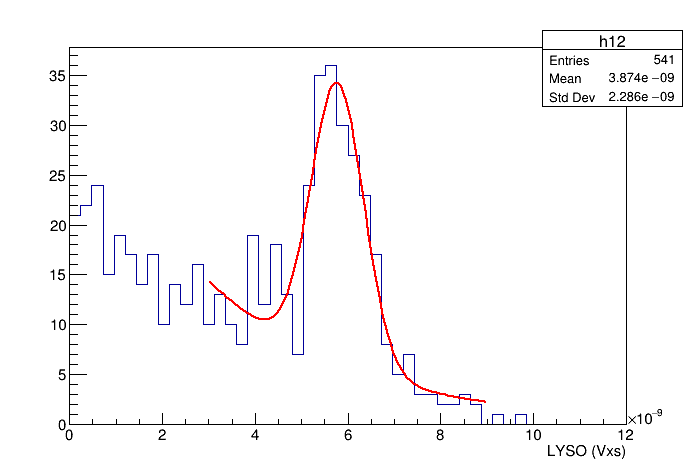

 FCN=12.2149 FROM MIGRAD    STATUS=CONVERGED     495 CALLS         496 TOTAL
                     EDM=8.50851e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.65493e+01   9.84665e+00   8.09968e-03  -7.42981e-05
   2  p1           2.81304e+01   3.38494e+00   6.26658e-03   7.15515e-05
   3  p2           5.78566e-09   6.60476e-11   1.51394e-13  -2.43157e+06
   4  p3           5.70767e-10   8.13865e-11   1.17270e-13  -1.53457e+06
   5  p4           3.21957e-09   5.87264e-10   4.54442e-13  -2.59745e+06
                               ERR DEF= 0.5
NaI2
511 keV@ 5.78566e-09+-6.60476e-11
sig @ 511 keV 5.70767e-10+-8.13865e-11


Warning in <TROOT::Append>: Replacing existing TH1: h12 (Potential memory leak).


In [28]:
TCanvas* c3 = new TCanvas();

TH1D* h12 = new TH1D("h12","",50,0,12e-9);
tree->Draw("-A2>>h12", "abs(-A3-A4-38e-9)<1e-9 &&    abs(-A3-20e-9)<5e-9 &&   abs(-A4-18e-9)<5e-9 && abs(T34+5e-9)<7e-9 && abs(T32)<2e-8 && T34!=0", "colz");

TF1* f12 = new TF1("f12","[0]*exp(-x/[4]) + gaus(1)",0,50e-9);
f12->SetParameter(0,1);
f12->SetParameter(1,10);
f12->SetParameter(2,6e-9); //centro gaussiana
f12->SetParameter(3,2e-9); //sigma gaussiana
f12->SetParameter(4,2e-9);
h12->Fit("f12","L", " ", 3e-9, 9e-9); //L:likelyhood 
h12->GetXaxis()->SetTitle("LYSO (Vxs)");
double p12 = f12->GetParameter(2); //centro gaussiana
double ep12 = f12->GetParError(2); //suo errore
double s12 = f12->GetParameter(3); //sigma gaussiana
double e12 = f12->GetParError(3);  //suo errore

cout << "NaI2" <<endl;
cout << "511 keV@ " << p12 << "+-" << ep12 << endl;
cout << "sig @ 511 keV " << s12 << "+-" << e12 << endl;

c3->Draw();